# Phys 260 Python Lab 3: Numpy tools in review (10 points)

# Introduction

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST -- see your feedback in html (launch a browser)*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9a EST**

*Homework typically graded by Thursday 5p -- see your feedback in html (launch a browser)*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  

## Preflight summary
- Brief review of actions along axes
- Useful numpy tools for derivatives
- Effects of discretization: Example with Gauss' Law

In [2]:
# Import relevant modules
import numpy as np
from matplotlib import pyplot as plt

## Brief review of actions along axes (5 points)

Below, we review the effects of doing things "along axes"
- With `np.linalg.norm`, 
- with `np.sum`,
- with `np.apply_along_axis`.

First, we use `np.reshape` to create a (4,5) array and examine how this function works.

In [6]:
test_array = np.arange(20)
reshaped_array = np.reshape(test_array, (4,5))

**Practice inspection** (1 point):
Inspect both `test_array` and `reshaped_array` (you can print both, and/or print both sizes in the cell above).  What does `np.reshape` do? 

**Answer**:

Outputs the elements from the array in the first argument (`test_array`) in an array of shape given in the second argument (`(4,5)`).

**Norm of different axes** (1 point): 

- Use `np.reshape` with `test_array` to create a `(2,10)` array called `reshaped_2_10`.  Assume these are (x,y) coordinates.  Use `np.linalg.norm` to find the 2-d radius of each of these coordinates, called `radii_2_10`.

- Use Use `np.reshape` with `test_array` to create a `(10,2)` array called `reshaped_10_2`.  Assume these are (x,y) coordinates.  Use `np.linalg.norm` to find the 2-d radius of each of these coordinates, called `radii_10_2`.

In [31]:
# Define reshaped_2_10, radii_2_10, reshaped_10_2, radii_10_2 here
### BEGIN SOLUTION
reshaped_2_10 = np.reshape(test_array, (2,10))
radii_2_10 = np.linalg.norm(reshaped_2_10, axis=0)

reshaped_10_2 = np.reshape(test_array, (10,2))
radii_10_2 = np.linalg.norm(reshaped_10_2, axis=1)
### END SOLUTION

(2, 10) (10,)


In [38]:
"""Execute to check you're on the right track"""
assert(radii_10_2.shape == radii_2_10.shape)
assert((reshaped_2_10 == np.reshape(test_array, (2,10))).all())
### BEGIN HIDDEN TESTS
assert((reshaped_2_10 == np.reshape(test_array, (2,10))).all())
assert((radii_2_10 == np.linalg.norm(reshaped_2_10, axis=0)).all())
assert((reshaped_10_2 == np.reshape(test_array, (10,2))).all())
assert((radii_10_2 == np.linalg.norm(reshaped_10_2, axis=1)).all())
### END HIDDEN TESTS

**Question for inspection** (1 point): Are `radii_10_2` and `radii_2_10` the same as one another?  How would you check? (*Hint*: some of the assertion tests show how to do this.)  Why or why are they not the same.

**Answer:**

They are not the same.  You can check with an assertion statement like the second one above, `assert((radii_2_10==radii_10_2).all())`.  You need the all to check equality of every element.  These are not the same because the numbers 0-19 have different pairings, depending on how they are reshaped.  One pairs sequential numbers, and the other paired numbers 10 apart.

**Quick exercise** (1 point): Use the appropriately reshaped array from the previous exercise (hint: one of the `reshaped_?_?` arrays) and the function `np.sum` with the appropriate key word argument to return a (2,) array, `sum_even_odd`, where one element corresponds to the sum of all even integers less than 20, and the other element corresponds to all odd integers less than 20.

In [46]:
# Define sum_even_odd here
### BEGIN SOLUTION
sum_even_odd = np.sum(reshaped_10_2,axis=0)
### END SOLUTION

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [47]:
"""Execute to check you're on the right track"""
assert(sum_even_odd.shape == (2,))
assert(sum_even_odd[0] == np.sum(np.arange(0,20,2)))
assert(sum_even_odd[1] == np.sum(np.arange(1,21,2)))

**Quick exercise** (1 point):  Use `np.apply_along_axis` to calculate the same array as `sum_even_odd`, now called `sum_even_odd_from_axis`.  Note, here, you will also need to use `np.sum`, but will not use the key word `axis=`.

In [51]:
# Define sum_even_odd_from_axis here
### BEGIN SOLUTION
sum_even_odd_from_axis = np.apply_along_axis(np.sum, 0, reshaped_10_2)
### END SOLUTION

array([ 90, 100])

In [53]:
"""Execute to check you're on the right track"""
assert(sum_even_odd_from_axis.shape == (2,))
### BEGIN HIDDEN TESTS
assert((sum_even_odd_from_axis == np.apply_along_axis(np.sum, 0, reshaped_10_2)).all())
### END HIDDEN TESTS

## Useful numpy tools for derivatives

In the next tutorial/hw, you will need to numerically evaluate derivatives.   The derivative is defined as $$\frac {df}{dx} = \lim_{\epsilon \to 0} \frac {f(x+\epsilon) - f(x)}{\epsilon}.$$  To evaulate this numerically we make $\epsilon$ small but finite.  For example if we are calculating a function on a grid of spacing $\delta$  we can approximate the derivative as $$\frac {df}{dx} \approx \frac {f(x+\delta) - f(x)}{\delta}$$  However, we can do a better job by making the derivative symmetric about the point at which we are calculating it:
$$\frac {df}{dx} \approx \frac {f(x+\delta) - f(x - \delta)}{2 \delta}$$ 
To calculate derivatives elements to the right and left of an element.   Array operations give us an easy way to do this.


- `np.roll` applied to taking the numerical derivative (see how it works!)
- `np.gradient` pretty much what you were doing before, but with a built-in function

Let's say our function is $f=x^2$, and x is our `test_array` so each element corresponds to our spacign where $\delta=1$.  First, let's find the $f(x+\delta)$, which we will call `f_right`:

In [62]:
f = test_array**2
f_right = np.roll(f,-1)

**Quick exercise** (1 point): Use `np.roll` (examine what happened with `f_right` above, and see the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.roll.html)) to find `f_left` ($f(x-\delta)$), and calculate `df_dx`.

In [63]:
# Calculate f_left and df_dx here
### BEGIN SOLUTION
f_left = np.roll(f,1)
df_dx = (f_right - f_left)/2
### END SOLUTION

In [65]:
"""Execute to check you're on the right track"""
assert((f_left == np.roll(f,1)).all())
### BEGIN HIDDEN TESTS
assert((df_dx == (f_right - f_left)/2).all())
### END HIDDEN TESTS

**Plot to check** (1 point) You'll likely notice that the boundaries (i.e. first and last elements) look funky.  With general simulations of physical systems, one often creates boundary conditions or ignores the results in the boundary.  Plot `df_dx` vs. `test_array`, ignoring the first and last elements.  You'll need to recall array slicing to do that (*Hint*: the first element is indexed by 0, so you'll want to start at index 1, and the last element is indexed by -1).  Does this look like what you expect given the derivative of $x^2$?  Full credit with labeled axes and legible axes (I like to recomment 'xx-large' fontsize for axes labels).

Text(0,0.5,'df/dx = 2x')

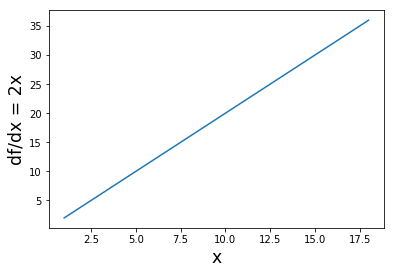

In [69]:
# Plot df_dx here
### BEGIN SOLUTION
plt.plot(test_array[1:-1], df_dx[1:-1])
plt.xlabel('x',fontsize='xx-large')
plt.ylabel('df/dx = 2x', fontsize='xx-large')
### END SOLUTION

## Effects of discretization: Example with Gauss' Law

## Gauss' law due to a spherical insulator

Gauss' law states that a closed surface has a total flux equal to the charge enclosed.  Write a function, `calc_efield_sphere_gauss` that calculates the electric field due to an insulating sphere that we discussed in the tutorial portion, e.g. the And compare with the numerical calculation from discretized charge in the tutorial.

In [ ]:
def calc_efield_sphere_gauss(points_in_meshgrid, sphere_radius=1, Q=1) :
    '''
    
    '''
    
### BEGIN SOLUTION
    pass
### END SOLUTION

## Compare the Gauss' law (exact) calculation to the discretized version (2 points)

Take the function, `calc_efield_sphere_gauss`, and calculate the electric field for `points_in_meshgrid`, `efield_sphere_gauss`.    

In [ ]:
#  Calculate efield_sphere_gauss here
### BEGIN SOLUTION
efield_sphere_gauss = calc_efield_sphere_gauss(points_in_meshgrid)
### END SOLUTION

In [ ]:
"""Execute to check that you are properly calculating efield_sphere_gauss"""
#assert()
### BEGIN HIDDEN TESTS

### END HIDDEN TESTS

Now, let's plot the ratio between the two as measured along the x-axis ($y, z=0$).  First, identify the part of the arrays corresponding to the x-axis points.